In [3]:
# 02_eda_univariate.ipynb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

returns_file_path = os.path.join("..", "data", "processed", "GC_F_returns.csv")
df_returns_or = pd.read_csv(returns_file_path, parse_dates=["Date"], index_col="Date")
returns_or = df_returns_or["LogReturn"]

In [4]:
mean_or = returns_or.mean()
std_or = returns_or.std()
skew_or = returns_or.skew()
kurt_or = returns_or.kurtosis()

print("Statistiques descriptives pour GC=F :")
print(f"  Moyenne journalière (log-return)   : {mean_or:.6f}")
print(f"  Écart-type quotidien (log-return)  : {std_or:.6f}")
print(f"  Skewness                          : {skew_or:.3f}")
print(f"  Kurtosis                          : {kurt_or:.3f}")

Statistiques descriptives pour GC=F :
  Moyenne journalière (log-return)   : 0.000399
  Écart-type quotidien (log-return)  : 0.009472
  Skewness                          : -0.147
  Kurtosis                          : 3.452


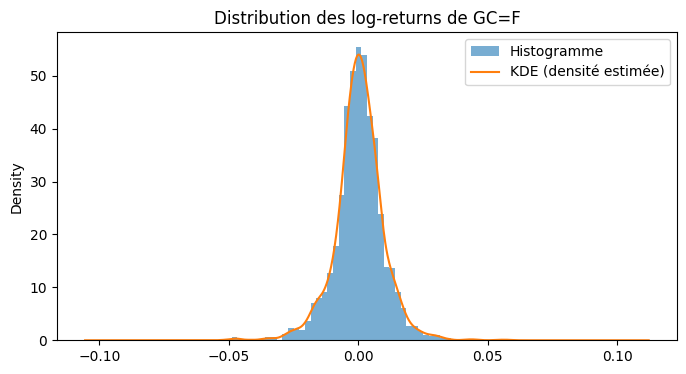

In [6]:
# Trace l'histogramme + KDE
plt.figure(figsize=(8, 4))
plt.hist(returns_or, bins=50, density=True, alpha=0.6, label="Histogramme")
returns_or.plot(kind="kde", label="KDE (densité estimée)") #KDE ?
plt.title("Distribution des log-returns de GC=F")
plt.legend()
plt.show()

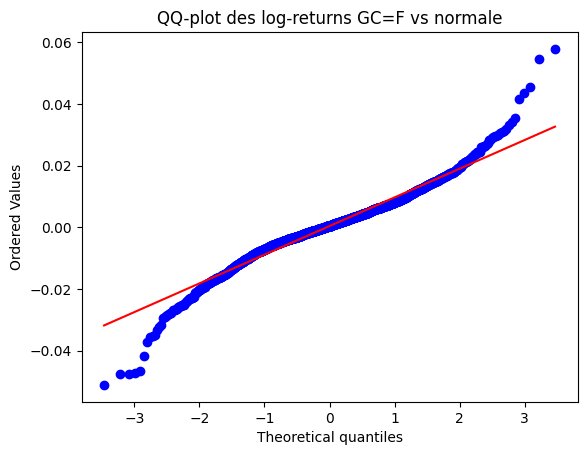

In [7]:
# QQ-plot pour comparer avec une normale centrée réduite
stats.probplot(returns_or, dist="norm", plot=plt)
plt.title("QQ-plot des log-returns GC=F vs normale")
plt.show()

In [10]:
shapiro_test = stats.shapiro(returns_or)
print(f"Shapiro-Wilk pour GC=F : stat={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
print("On rejette l’hypothèse de normalité.")


Shapiro-Wilk pour GC=F : stat=0.9613, p-value=0.0000
On rejette l’hypothèse de normalité.


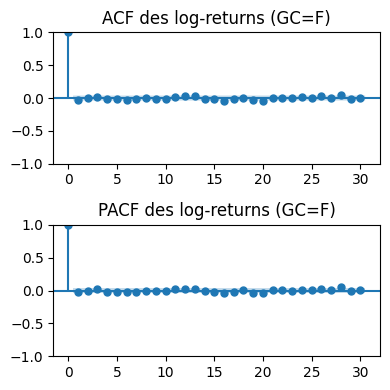

<Figure size 400x400 with 0 Axes>

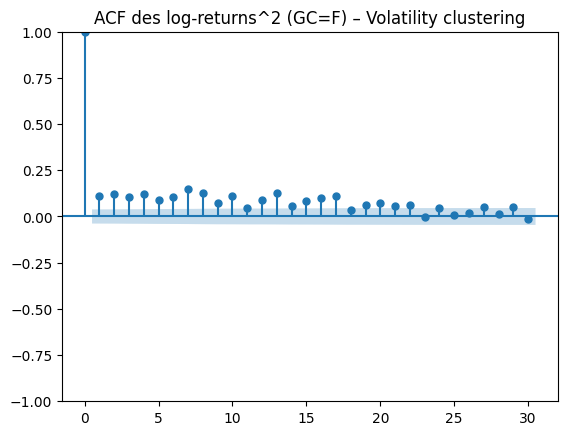

In [12]:
# ACF et PACF des retours
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(returns_or, ax=ax[0], lags=30)
ax[0].set_title("ACF des log-returns (GC=F)")
plot_pacf(returns_or, ax=ax[1], lags=30, method="ywm")
ax[1].set_title("PACF des log-returns (GC=F)")
plt.tight_layout()
plt.show()

# ACF des retours au carré (pour voir le clustering de volatilité)
returns_or_sq = returns_or ** 2
plt.figure(figsize=(8, 4))
plot_acf(returns_or_sq, lags=30)
plt.title("ACF des log-returns^2 (GC=F) – Volatility clustering")
plt.show()
